# Исследование рынка игровой индустрии

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


**План работы**

1. Изучить общую информацию из файла 
2. Подготовка данных:
* Предобработка (ошибки, пропуски, дубли)
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3. Провести исследовательский анализ данных:
* Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. 
* Соотнести выводы с продажами игр на других платформах.
* Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
4. Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5). 
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.




 




 



## Изучить общую информацию из файла

Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#!pip install missingno

#import missingno as msno
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv', sep='\t')
except:
    df = pd.read_csv('games.csv', sep=',')
    
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
#Посмотрим наименования столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
#Проверим явные дубликаты
df.duplicated().sum()

0

In [7]:
#посмотрим долю пропусков 
df.isna().mean().sort_values(ascending=False)

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Name               0.000120
Genre              0.000120
Platform           0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
dtype: float64

In [8]:
#Визуализируем наши значения, чтобы увидеть, где больше всего пропусков
#msno.bar(df)

**Вывод:** Обратим внимание на следующее:
1. Наименования столбцов записаны по разному, приведем все к нижнему регистру. Также как и наименования строк в Name, platform,Genre
2. Есть пропуски в данных, столбцы: Name, Year_of_Release, Genre, Critic_Score, User_Score,Rating
3. Изменим тип данных в столбцах: 
- Year_of_Release-год тип float, заменим на int, так как нам важен только год 
- User_Score - тип object, переведем в float, т.к.  оценка пользователей (максимум 10). 

Подробнее разберем каждый столбец.

## Подготовка данных

### Предобработка (ошибки, пропуски, дубли)

#### Заменим наименования столбцов

In [9]:
#Приведем к нижнему регистру
df.columns = df.columns.str.lower()

In [10]:
#Проверим результат
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Опечаток и других отклонений в наименование столбцов нет  больше нет.

#### Функция для просмотра данных в анализе

In [11]:
#Создадим функцию обработки для просмотра типа данных, пропусков, ошибок
def analysis(column):
    print('тип данных:', df[column].dtypes)
    print()
    print('количество пропусков', df[column].isna().sum())
    print()
    print('доля пропусков', df[column].isna().mean())
    print()
    print('уникальные значения:','\n', df[column].value_counts())
    print()
    if df[column].dtypes != 'object':
        print('описание данных','\n', df[column].describe())
        print()
        print('минимум: ', df[column].min(),'максимум: ', df[column].max() )
       

#### name -  название игры

In [12]:
analysis('name')

тип данных: object

количество пропусков 2

доля пропусков 0.00011965300628178283

уникальные значения: 
 Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64



In [13]:
#переведем все в нижний регистр
df['name'] = df['name'].str.lower()

In [14]:
df['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

In [15]:
len(df['name'].unique())

11560

In [16]:
#уберем точки в name
df['name'] = df['name'].str.replace('.','',regex=True)

In [17]:
# проверим изменения
len(df['name'].unique())

11560

In [18]:
#Посмотри что за два пропуска у нас
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Доля незначительная, удалим пропуск, заодно удалится и в genre

In [19]:
df = df.dropna(subset=['name'])

In [20]:
#проверим результат
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [21]:
#Проверим, чтобы лишние строки не удалились
df['name'].shape[0]

16713

**Итог:**

Удалили строки с пропусками в name и одновременно в genre, так как доля пропусков составляет  0.000119 и нет данных ни по оценкам пользователей, ни по оценкам критиков, ни рейтингов. 
Названия перевели для удобства в нижний регистр
Явных ошибок в названиях игр не обнаружено

#### genre -  жанр игры


In [22]:
analysis('genre')

тип данных: object

количество пропусков 0

доля пропусков 0.0

уникальные значения: 
 Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64



**Итог:**

Так как мы удалили пропуски в name, то пропусков в genre не осталось.
Ошибок в названиях не обнаружено

#### platform — платформа

In [23]:
analysis('platform')

тип данных: object

количество пропусков 0

доля пропусков 0.0

уникальные значения: 
 PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64



**Итог:**

Каких-то явных проблем в данных нет, пропусков тоже нет.


#### year_of_release — год выпуска

In [24]:
analysis('year_of_release')

тип данных: float64

количество пропусков 269

доля пропусков 0.016095255190570215

уникальные значения: 
 2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

описание данных 
 count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

минимум:  1980.0 максимум:  2016.0


In [25]:
df.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим несколько игр,есть ли связь для заполнения

In [26]:
df.query("name == 'madden nfl 2004'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [27]:
df.query("name == 'fifa soccer 2004'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [28]:
df.query("name == 'lego batman: the videogame'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,lego batman: the videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,lego batman: the videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,lego batman: the videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,lego batman: the videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,lego batman: the videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,lego batman: the videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Видим, что платформы разные, поэтому заполнить пропуски мы не сможем. Так как выход одной игры на разных платформах может отличаться, разница может составлять 1-5 лет.




Заменим год на любое число и посмотрим на сумму продаж у записей с пропусками  
Например: 2099

In [29]:
df['year_of_release'] = df['year_of_release'].fillna(2099)

In [30]:
df.pivot_table(index='year_of_release',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum',margins=True)

,eu_sales,jp_sales,na_sales
year_of_release,,,
1980.0,0.67,0.00,10.59
1981.0,1.96,0.00,33.40
1982.0,1.65,0.00,26.92
1983.0,0.80,8.10,7.76
1984.0,2.10,14.27,33.28
1985.0,4.74,14.56,33.73
1986.0,2.84,19.81,12.50
1987.0,1.41,11.63,8.46
1988.0,6.59,15.76,23.87


Пропуски занимают малую часть от общего объема продаж в разные годы, поэтому удалим пропуски

In [31]:
df = df.query('year_of_release != 2099')

In [32]:
#Проверим результат
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [33]:
df['year_of_release'].shape[0]

16444

In [34]:
#проверим результат
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [35]:
#Проверим, чтобы лишние строки не удалились
df['year_of_release'].shape[0]

16444

После удаления, изменим тип данных на int

In [36]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [37]:
#Проверим результат
df['year_of_release'].dtypes

dtype('int32')

**Итог** 

Удалили пропущенные значения, так как доля пропусков составляет 1,6% и выход одной игры на разных платформах может отличаться, разница может составлять 1-5 лет.

Изменили тип данных на int, так как нас интересует только год выпуска.

#### Продажи na_sales, eu_sales, jp_sales, other_sales

In [38]:
analysis('na_sales')

тип данных: float64

количество пропусков 0

доля пропусков 0.0

уникальные значения: 
 0.00     4449
0.02      562
0.03      554
0.04      543
0.05      536
         ... 
5.39        1
3.03        1
3.56        1
2.82        1
41.36       1
Name: na_sales, Length: 401, dtype: int64

описание данных 
 count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

минимум:  0.0 максимум:  41.36


In [39]:
analysis('eu_sales')

тип данных: float64

количество пропусков 0

доля пропусков 0.0

уникальные значения: 
 0.00     5766
0.01     1467
0.02     1290
0.03      911
0.04      702
         ... 
1.52        1
5.75        1
2.17        1
2.78        1
28.96       1
Name: eu_sales, Length: 307, dtype: int64

описание данных 
 count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

минимум:  0.0 максимум:  28.96


In [40]:
analysis('jp_sales')

тип данных: float64

количество пропусков 0

доля пропусков 0.0

уникальные значения: 
 0.00    10300
0.02      733
0.01      697
0.03      540
0.04      391
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: jp_sales, Length: 244, dtype: int64

описание данных 
 count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

минимум:  0.0 максимум:  10.22


In [41]:
analysis('other_sales')

тип данных: float64

количество пропусков 0

доля пропусков 0.0

уникальные значения: 
 0.00    6492
0.01    3398
0.02    1596
0.03     910
0.04     641
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: other_sales, Length: 155, dtype: int64

описание данных 
 count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

минимум:  0.0 максимум:  10.57


**Итог:**
Без изменений. В столбцах нет пропусков или особенностей.


#### critic_score — оценка критиков (максимум 100)


In [42]:
analysis('critic_score')

тип данных: float64

количество пропусков 8461

доля пропусков 0.5145341765993675

уникальные значения: 
 70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64

описание данных 
 count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

минимум:  13.0 максимум:  98.0


In [43]:
#Посмотрим в каких столбцах пропуски
df.query('critic_score.isna()').sort_values(by = 'name').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,beyblade burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,fire emblem fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,frozen: olaf's quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,frozen: olaf's quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,haikyu!! cross team match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
4728,'98 koshien,PS,1998,Sports,0.15,0.10,0.12,0.03,NaN,NaN,NaN
4475,007: quantum of solace,PS2,2008,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
1204,007: the world is not enough,N64,2000,Action,1.13,0.38,0.02,0.03,NaN,NaN,NaN
423,007: tomorrow never dies,PS,1999,Shooter,1.72,1.33,0.00,0.16,NaN,NaN,NaN
16220,1/2 summer +,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


**Итог:**

В столбце присутствует много пропусков 51%. Заполнить медианой пропуски не можем, так как слишком большая потеря в данных, замена может привести к искажению результатов. Какой то другой связи для заполнения не обнаружено, оценки на разных платформах могут отличаться. Нулевое значение также можеи исказить наши результаты.

Оставим без изменений

#### user_score — оценка пользователей (максимум 10)


In [44]:
analysis('user_score')

тип данных: object

количество пропусков 6605

доля пропусков 0.4016662612503041

уникальные значения: 
 tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64



Отметим, что у нас много пропусков 40% и 2376 значений tbd  
tbd переводится как  To Be Determined(Будет определено). Заменим данные значения на nan.

Пропуски оставляем без изменений. В уникальных значениях есть пользователь с 0 рейтингом, поэтому 0 не заменяем, может исказить результаты. Медианой тоже не заменяем, так как слишком большая потеря в данных

In [45]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [46]:
#Проверим результат
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [47]:
#Проверим долю пропусков
df['user_score'].isna().mean()

0.5461566528825104

In [48]:
#Изменим тип данных на float, так как рейтинг пользователей измеряется оценкой от 0-10
df['user_score'] = df['user_score'].astype('float')

In [49]:
#Проверим результат

In [50]:
df['user_score'].dtype

dtype('float64')

**Итог:**

Уникальное значение tbd заменили на nan, так как рейтинг не определен для данных игр.  
Пропуски оставили без изменений, чтобы не исказить данные. Доля пропусков 54.6%  
Изменили тип данных на числовой,так как рейтинг пользователей измеряется оценкой от 0-10

####  rating — рейтинг от организации ESRB


In [51]:
analysis('rating')

тип данных: object

количество пропусков 6676

доля пропусков 0.40598394551204087

уникальные значения: 
 E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64



40.6% пропусков, определить рейтинг мы не можем, поэтому заменим на неизвестно "unknown"

In [52]:
df['rating'] = df['rating'].fillna('unknown')

Проверим обозначения рейтингов, информацию взяла по этой [ссылке](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board).

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

| Рейтинг | Определение | Возраст|
|:--:|:--:|:--:|
|E | («Everyone») — «Для всех»   |  любой
|T  | («Teen») — «Подросткам»    | от 13 лет
|M  |   («Mature») — «Для взрослых»   | от 17 лет
|E10+ | («Everyone 10 and older») — «Для всех от 10 лет и старше | от 10 лет
|EC  | («Early childhood») — «Для детей младшего возраста» | от 3х лет|      
|K-A |  ("Kids to Adults") -старое название, теперь применяется рейтинг E   | любой
|AO  | («Adults Only 18+») — «Только для взрослых      | старше 18 лет
|RP   |  («Rating Pending») — «Рейтинг ожидается»    | неизвестно



Так как у нас рейтинг для любого возраста назывался K-A, а теперь E, то приведем их к одному актуальному E

In [53]:
df['rating'] = df['rating'].replace('K-A','E')

In [54]:
#Проверим результат
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**Итог:**
Объединили рейтинг K-A с Е, так как это старое и новое название для рейтинга игр любого возраста.

Заменили пропуски на unknown, так как нет возможности их заполнить по другому. Заменить на RP-рейтинг ожидается, мы тоже не можем, так как пропуски в данных не говорят нам о том, что у этих игр нет рейтинга от  ESRB.

Думаю, что пропуски связаны с тем, что ESRB рейтинг используется в США и Канаде, для игр других регионов он не применяется


Объединим остальные рейтинги:  
M («Для взрослых») с  AO (Только для взрослых)  
E (Для всех) с EC (Для детей младшего возраста)  
RP (Рейтинг ожидается) заменим на 'unknown'  

In [55]:
df['rating'] = df['rating'].replace('AO','M')

In [56]:
df['rating'] = df['rating'].replace('EC','E')

In [57]:
df['rating'] = df['rating'].replace('RP','unknown')

In [58]:
#Проверим результат
df['rating'].value_counts()

unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

**Итог**

Сократили оставшиеся категории в рейтинге ESRB и объединили их по смыслу с рейтингами, которые занимают большую часть данных.
В результате осталось 4 основных рейтинга:  
E - для всех               4001  
T - для подростков         2961  
M - для взрослых           1564  
E10+ -от 10 лет и старше   1420  

### Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [59]:
#Создадим столбец total_sales 
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [60]:
#Проверим результат
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Проверим итоговый результат

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [62]:
df.isna().mean().sort_values(ascending=False)

user_score         0.546157
critic_score       0.514534
name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
rating             0.000000
total_sales        0.000000
dtype: float64

**Вывод**

Проанализировали каждый столбец для дальнейшего анализа.

1. Привели к нижнему регистру заголовки и значения в столбцах: Name, platform,Genre
2. Проанализировали пропуски: 
* Name - удалили, так как доля пропусков всего 0.000120
* Year_of_Release - удалили, так как пропусков 1,6% и выход одной игры на разных платформах может отличаться, разница может составлять 1-5 лет.
* Genre -удалили, так как доля пропусков 0.000120
* Critic_Score - пропусков 51,4%, оставили без изменения, так как заполнение может привести к искажению результатов анализа.
* User_Score -  пропусков  была 40% , после 54.6%. Заменили значение 'tbd' на 'nan'. Пропуски оставили без изменения, так как заполнение может привести к искажению результатов анализа.
* Rating - пропусков 40,5%, заполнили значение 'unknown' и объединили рейтинг K-A с E (старое и новое название рейтинга)
3. Изменили тип данных в столбцах:
* Year_of_Release-заменили на int, так как нам важен только год
* User_Score - тип object, перевели в float, т.к. оценка пользователей (максимум 10).
4. Добавлен новый столбец total_sales - суммарные продажи во всех регионах



## Исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы
Ответим на вопрос: Важны ли данные за все периоды?

In [63]:
df_year = df.groupby('year_of_release').agg({'name':'count','total_sales':'sum'})
df_year.columns = ['count', 'sales']
df_year

,count,sales
year_of_release,,
1980,9,11.38
1981,46,35.68
1982,36,28.88
1983,17,16.80
1984,14,50.35
1985,14,53.95
1986,21,37.08
1987,16,21.70
1988,15,47.21


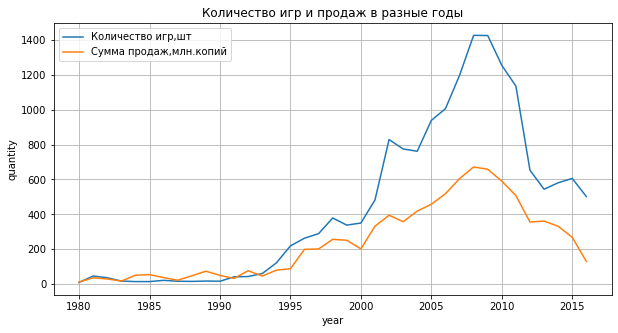

In [64]:
#построим график для наглядности
df_year.plot(grid=True, title='Количество игр и продаж в разные годы', figsize=(10,5))
plt.ylabel('quantity')
plt.xlabel('year')
plt.legend(['Количество игр,шт', 'Сумма продаж,млн.копий'])
plt.show()

Данные у нас за 1980-2016 года. Рост начинается с 1994г и достигает пика в 2008-2009г , потом идет на спад и к 2016 году он стал на уровне 2000-2001 года.

Так как количество релизов до 1994 совсем небольшое в сравнение с остальными, также прошло более 20 лет и их можно считать устаревшими.

**Итог**

Количество выпускаемых игр начало расти в начале 90-х и достигло своего пика в 2008-2009г, потом мы наблюдаем спад до 2016г. включительно. 
Рост продаж, скорее всего связан с тем, что начались инновации в играх, переход на улучшенную графику и тд.
Спад, скорее всего, связан с тем, что произошло перенасыщение рынка игр, игры перешли в мобильный телефон, нет значимых новых инновация.

Количество игр до 1994 очень маленький и прошло более 20 лет, данные можно считать устаревшими. 

Проанализируем дальше и выделим актуальный период


### Посмотрим, как менялись продажи по платформам
*План*
- Проанализируем платформы с наибольшими суммарными продажами и построим распределение по годам
- Ответим на вопрос: За какой характерный срок появляются новые и исчезают старые платформы?

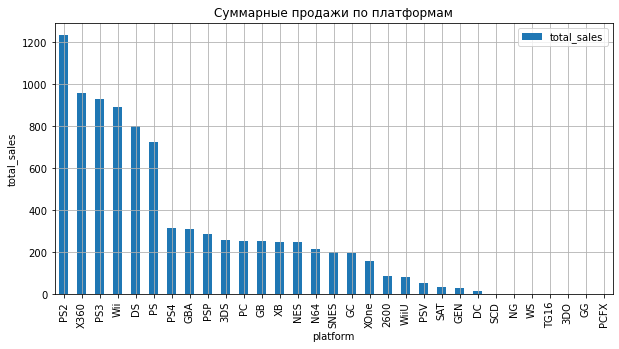

In [65]:
#Посмотрим платформы с наибольшими суммарными продажами
(df.pivot_table(index='platform',
               values='total_sales',aggfunc='sum')
    .sort_values(by='total_sales',ascending=False)
    .plot(kind='bar',figsize=(10, 5), grid=True,title='Суммарные продажи по платформам')
)
plt.ylabel('total_sales')
plt.xlabel('platform')
plt.show()


У нас есть 6 лидеров, выделим их и посмотрим срок жизни платформы по годам

In [66]:
#Создадим список с лидерами
best6 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


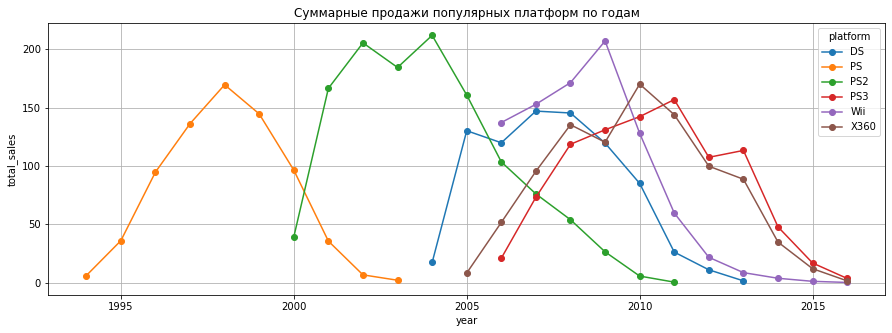

In [67]:
(df.query('platform in @best6 and year_of_release>1993')
    .pivot_table(index='year_of_release',columns='platform', values='total_sales',aggfunc='sum')
    .plot(figsize=(15, 5), grid=True, style ='o-',title='Суммарные продажи популярных платформ по годам')
)
plt.ylabel('total_sales')
plt.xlabel('year')
plt.show()


**Итог**
* Мы посмотрели платформы с наибольшими суммарными продажами, выделили топ-6:'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'
* Построили распределение по годам для платформ из топ-6

Ответим на вопрос:За какой характерный срок появляются новые и исчезают старые платформы?

Исходя из полученного графика мы видим, что платформы появляются и пропадают в течение 10 лет. 

Для нашего анализа актуально взять период в 5 лет, чтобы проанализировать платформы которые набирают популярность или находятся на пике. Для прогноза на 2017 год

###  Определить актуальный период для анализа.

Так как у нас основной фактор для выбора,это данные, которые помогут построить прогноз на 2017 год.
То исходя из прерыдущих выводов посчитаем: 2017-10/2 = 2012. Т.о. можно взять период после 2012 года. 

Посмотрим на распределение оставшихся платформ:
      

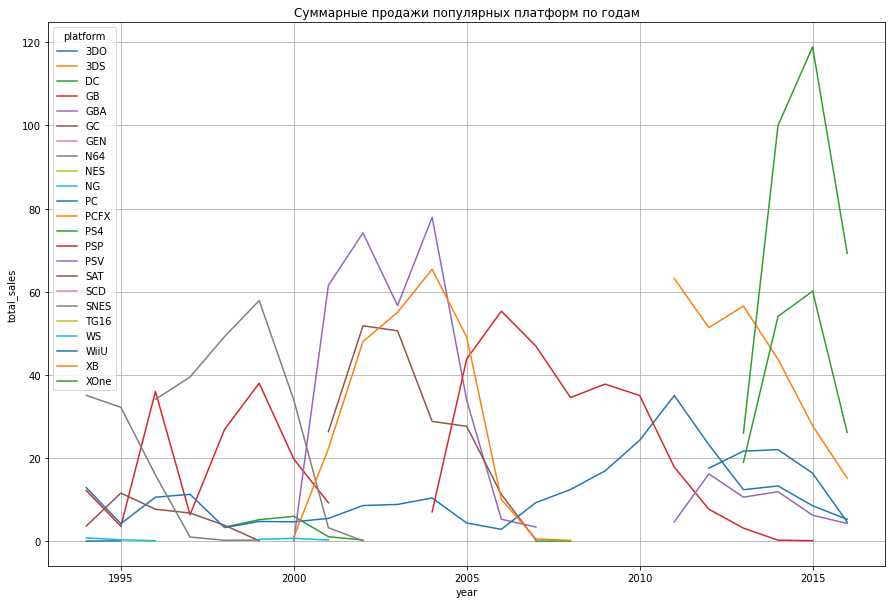

In [68]:
(df.query('platform not in @best6 and year_of_release>1993')
    .pivot_table(index='year_of_release',columns='platform', values='total_sales',aggfunc='sum')
    .plot(figsize=(15, 10), grid=True, style ='-',title='Суммарные продажи популярных платформ по годам')
)
plt.ylabel('total_sales')
plt.xlabel('year')
plt.show()


Отметим, что у всех платформ есть жизненный период, но PC работает стабильно на протяжение многих лет
      

In [69]:
#Создадим новую таблицу с актуальным периодом
df_filter = df.query('year_of_release > 2012').reset_index(drop=True)
df_filter.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


**Итог**
Выбрали актуальный период самостоятельно в результате исследования предыдущих вопросов. Учли основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальный период: данные с 2013 года

###  Какие платформы лидируют по продажам, растут или падают? 
Выбрать несколько потенциально прибыльных платформ.

In [70]:
#Посмотрим продажи с учетом актуального периода
df_platform = (df_filter.groupby('platform').agg(({'name':'count','total_sales':'sum'}))
      .sort_values(by='total_sales',ascending=False)
              )
df_platform.columns=['count','sales']
df_platform 

,count,sales
platform,,
PS4,392,314.14
PS3,345,181.43
XOne,247,159.32
3DS,303,143.25
X360,186,136.80
WiiU,115,64.63
PC,189,39.43
PSV,358,32.99
Wii,23,13.66


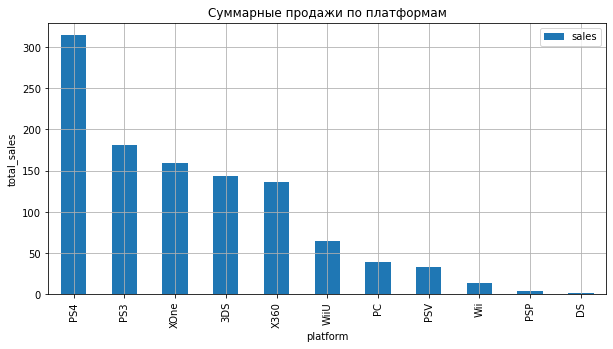

In [71]:
#построим график
df_platform.plot(kind='bar',y='sales', figsize=(10, 5), grid=True,title='Суммарные продажи по платформам')

plt.ylabel('total_sales')
plt.xlabel('platform')
plt.show()

Можно выделить топ лидеров по продажам за актуальный период

Посмотрим также растут или падают в разбивке платформы по годам

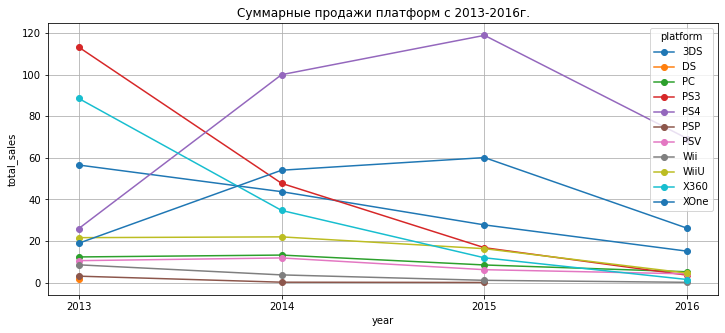

In [72]:
#построим график по годам с учетом актуального периода
(df_filter
    .pivot_table(index='year_of_release',columns='platform', values='total_sales',aggfunc='sum')
    .plot(figsize=(12, 5), grid=True, style ='o-',title='Суммарные продажи платформ c 2013-2016г.')
    .set_xticks([2013,2014,2015,2016])
)
plt.ylabel('total_sales')
plt.xlabel('year')
plt.show()

Видно, что большинство платформ идут на спад, есть две платформы в росте: PS4 и XOne  
Отметим также платформу 3DS продажи идут на спад, но в сравнении с остальными они находится в рынке еще  
За ней идут: PS3, X360,WiU
Посмотрим какие продажи были ежегодно у этих платформ

In [73]:
(df_filter.query('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "WiiU"')
                .groupby(['platform','year_of_release'])['total_sales'].sum()
                )

platform  year_of_release
3DS       2013                56.57
          2014                43.76
          2015                27.78
          2016                15.14
PS4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
WiiU      2013                21.65
          2014                22.03
          2015                16.35
          2016                 4.60
XOne      2013                18.96
          2014                54.07
          2015                60.14
          2016                26.15
Name: total_sales, dtype: float64

Так как за 2016 год у нас были неполные данные, то можем сделать вывод что PS4 и XOne находятся в росте. 


**Итог**

Проанализировали платформы с учетом актуального периода.
Выбрали потенциально прибыльные платформы:  PS4 и XOne   
Для определения топ-5 возьмем еще: 3DS, X360 и WiiU

Так как у нас неполные данные за 2016 год, то дополним выбранные ранее платформы для анализа, ориентиром выберем, топ 7 платформ по продажам

PS4, XOne, 3DS, X360, WiiU, PS3, PC

Построим график для выбранных платформ

In [74]:
best7 = ['PS4', 'XOne','X360', 'PS3', 'WiiU', '3DS', 'PC']

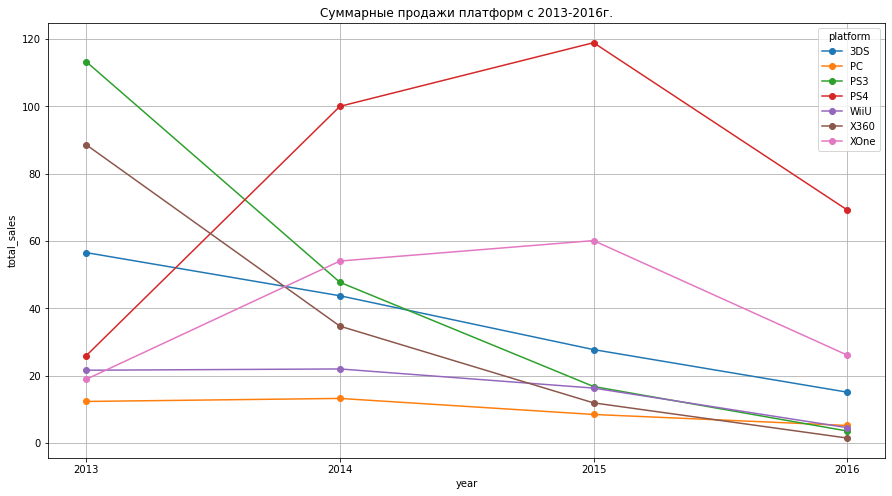

In [75]:
(df_filter
    .query('platform in @best7')
    .pivot_table(index='year_of_release',columns='platform', values='total_sales',aggfunc='sum')
    .plot(figsize=(15, 8), grid=True, style ='o-',title='Суммарные продажи платформ c 2013-2016г.')
    .set_xticks([2013,2014,2015,2016])
)
plt.ylabel('total_sales')
plt.xlabel('year')
plt.show()

In [76]:
(df_filter.query('platform in @best7')
                .pivot_table(index='year_of_release',columns='platform', values='total_sales',aggfunc='sum')
                )

platform,3DS,PC,PS3,PS4,WiiU,X360,XOne
year_of_release,,,,,,,
2013,56.57,12.38,113.25,25.99,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.60,1.52,26.15


**Итог**

Расширили перечень рекомендованных платформ  
Было: PS4, XOne, 3DS, X360, WiiU  
Стало: PS4, XOne, 3DS, X360, WiiU, PS3, PC  
Добавили стабильно работающую платформу на протяжении всего периода  -PC  
И PS3 - с 2006 года показывает хорошие результаты  

###  Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

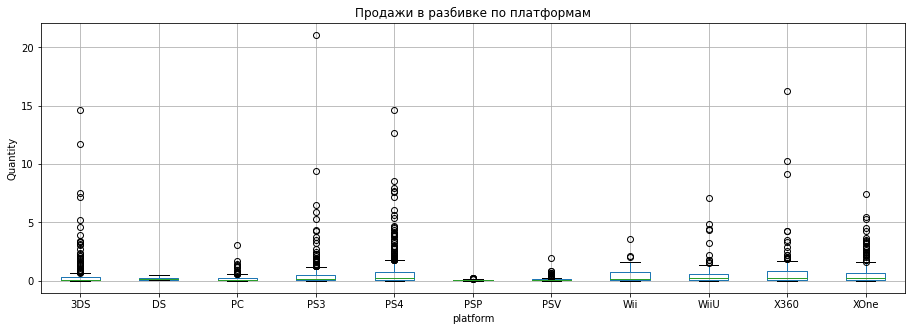

In [77]:
df_filter.boxplot('total_sales',by='platform',grid=True, figsize=(15,5))
plt.title("Продажи в разбивке по платформам")
plt.ylabel("Quantity")
plt.suptitle('');
plt.show()


Рассмотрим поближе полученные ящики

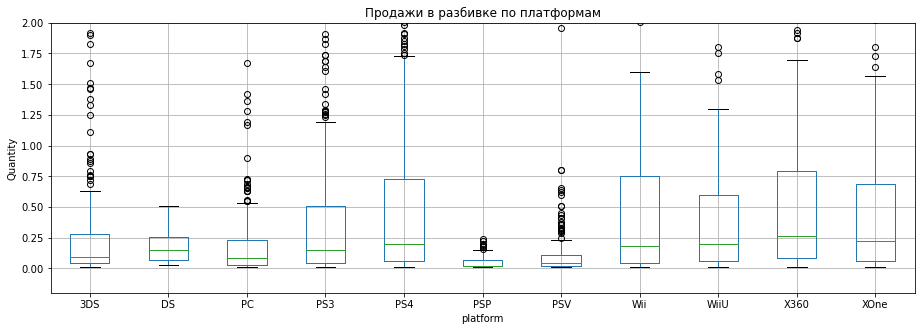

In [78]:
df_filter.boxplot('total_sales',by='platform',grid=True, figsize=(15,5)).set(ylim=(-0.2,2))
plt.title("Продажи в разбивке по платформам")
plt.ylabel("Quantity")
plt.suptitle('');
plt.show()


Из графика видим, что выше медиана и "хвост" у следующих платформ: PS3,PS4,X360,XOne,WiiU.  
Посмотрим ближе выделенные нами ранее платформы: PS4,XOne,3DS,X360 и WiiU, PC, PS3 


Посмотри сколько у платформ было игр, которые принесли максимум выручки, 

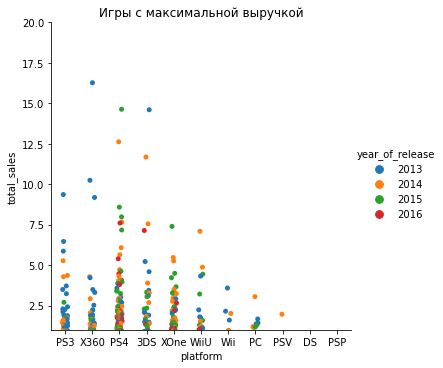

In [79]:
sns.catplot(x='platform',
            y='total_sales',
            data=df_filter,
           hue='year_of_release',
           ).set(ylim=(1, 20));
plt.title('Игры с максимальной выручкой')
plt.show()

In [80]:
(df_filter.query('total_sales > 2.0')
                .pivot_table(index='platform', values='name',aggfunc='count')
 .sort_values(by='name',ascending=False)
                )

,name
platform,
PS4,44
XOne,24
3DS,17
PS3,15
X360,12
WiiU,6
Wii,3
PC,1


In [81]:
#Сколько игр выпустилось на платформе за актуальный период
(df_filter
                .pivot_table(index='platform', values='name',aggfunc='count')
 .sort_values(by='name',ascending=False)
                )

,name
platform,
PS4,392
PSV,358
PS3,345
3DS,303
XOne,247
PC,189
X360,186
WiiU,115
PSP,67


Больше всего игр, которые принесли максимум выручки выпустили 
PS4,XOne,3DS,X360 и PS3.

Посмотрели платформы по количеству игр, которые принесли максимум выручки

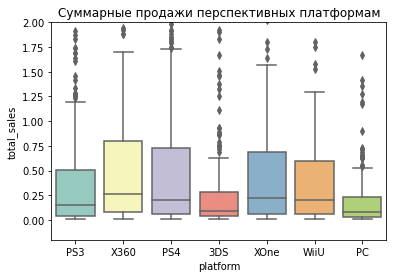

In [82]:
best3 = ['PS4','XOne','3DS','X360', 'WiiU','PC','PS3']
sns.boxplot(x='platform', y='total_sales', data =df_filter.query('platform in @best3'), palette='Set3').set(ylim=(-0.2,2))
plt.figsize=(20,5)
plt.title("Суммарные продажи перспективных платформам")
plt.show()



Медианные значения у PS4,XOne,X360 и WiiU. не сильно отличаются друг от друга, только у 3DS, PC,PS3 медиана намного ниже. У каждой платформы есть игры, которые принесли больше всего продаж.   
У 3DS маленький межквартильный размах и много выбросов. Большая часть продаж у них происходит засчет выбросов. А у XOne  и PS4 размах больше,ус длиннее и меньше выбросов, скорее всего у XOne  и PS4  покупают самые разные игры в большом количестве.  
X360 показывает хорошие результаты, стабильные данные и медиана высокая, но платформа начала свою работу в 2005 году, пик пришелся на 2010г и с каждым годом продажи стали только падать - не стала бы ее относить к потенциально перспективным   
WiiU c 2012 года и имеет небольшой объем продаж, но по диаграмме размаха показывает себя хорошо  
PS3 на рынке с 2006  года, пик поришелся на 2011, в последние годы наблюдается спад, но есть игры, которые приносят максимальный доход  
PC работает стабильно на протяжение многих лет, но имеет малый объем продаж


In [83]:
#Посмотрим значение медианы и среднего
(df_filter.query('platform in @best7')
                 .pivot_table(index='platform',values='total_sales',aggfunc=['mean','median'])
                )

,mean,median
,total_sales,total_sales
platform,,
3DS,0.472772,0.090
PC,0.208624,0.080
PS3,0.525884,0.150
PS4,0.801378,0.200
WiiU,0.562000,0.200
X360,0.735484,0.265
XOne,0.645020,0.220


In [84]:
(df_filter.query('platform in @best7')
                 .pivot_table(index='platform',values='total_sales',aggfunc=['mean','median'])
                )

,mean,median
,total_sales,total_sales
platform,,
3DS,0.472772,0.090
PC,0.208624,0.080
PS3,0.525884,0.150
PS4,0.801378,0.200
WiiU,0.562000,0.200
X360,0.735484,0.265
XOne,0.645020,0.220


**Итог**
Игр выпускается много, но не все становятся популярными, медиана XOne и PS4 не сильно отличаются друг от друга, у них больше игр выпускается и больше из них становятся успешными, они работают стабильнее.  
3DS  меньше игр, но есть успешные, которые приносят основной доход(большое количество выбросов). 
WiiU c 2012 года и имеет небольшой объем продаж, но по диаграмме размаха показывает себя хорошо
X360, PS3, PC -старые платформы, налюдается спад продаж в последние годы

Топ 7 - PS4,XOne,3DS,X360 и WiiU, PC, PS3
Как топ-3 оставляем: XOne и PS4,WiiU

###  Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Будем смотрить выбранные ранее платформы: PS4,XOne,3DS,WiiU

In [85]:
#напишем функцию для вывода коррелляция и построения графиков
def score(row):
    print('Корреляция между оценкой критиков и продажами для',row,':', df_filter.loc[df_filter['platform'] == row]['critic_score'].corr(df_filter['total_sales']).round(2))
    print('Корреляция между оценкой пользователей и продажами для',row,':', df_filter.loc[df_filter['platform'] == row]['user_score'].corr(df_filter['total_sales']).round(2))
    df_filter.loc[df_filter['platform'] == row].plot(kind='scatter', x='critic_score', y='total_sales',
                       figsize=(8, 4), color='b',alpha=0.5);
    plt.ylim(0,4)
    plt.title("Зависимость продаж от оценок критиков")

    df_filter.loc[df_filter['platform'] == row].plot(kind='scatter', x='user_score', y='total_sales',
                       figsize=(8, 4), color='b',alpha=0.5);
    plt.ylim(0,4)
    plt.title("Зависимость продаж от оценок пользователей")
    plt.show()
   

**PS4**

Корреляция между оценкой критиков и продажами для PS4 : 0.41
Корреляция между оценкой пользователей и продажами для PS4 : -0.03


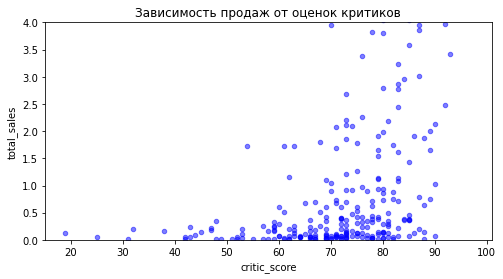

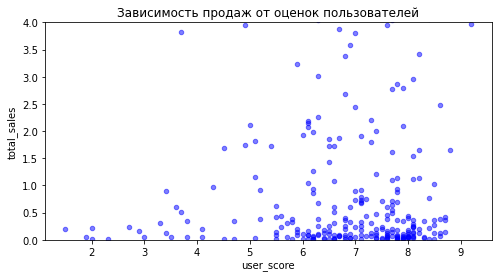

In [86]:
score('PS4')

**XOne**

Корреляция между оценкой критиков и продажами для XOne : 0.42
Корреляция между оценкой пользователей и продажами для XOne : -0.07


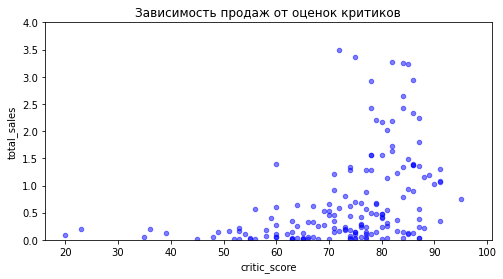

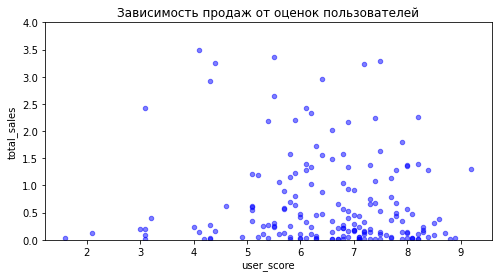

In [87]:
score('XOne')

**3DS**

Корреляция между оценкой критиков и продажами для 3DS : 0.36
Корреляция между оценкой пользователей и продажами для 3DS : 0.24


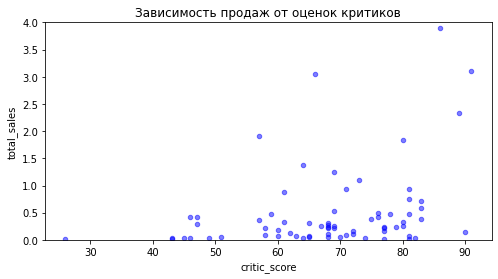

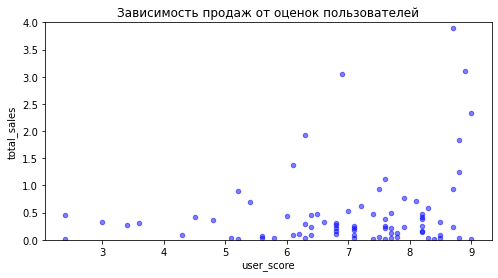

In [88]:
score('3DS')

**WiiU**

Корреляция между оценкой критиков и продажами для WiiU : 0.38
Корреляция между оценкой пользователей и продажами для WiiU : 0.42


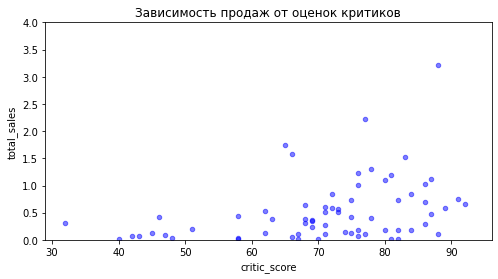

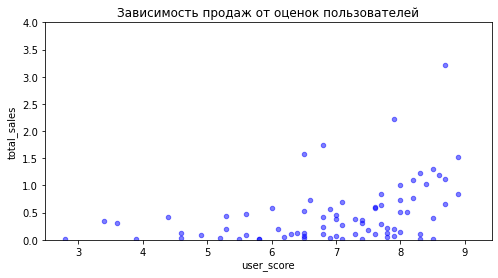

In [89]:
score('WiiU')

**Итог**

Корреляция по платформам между отзывами и продажами:

platform |critic_score | user_score | 
:--------:|:-------:|:-----------:|
  PS4    | 0.41          |-0.03 |
 XOne     |  0.42       | -0.07|
3DS       |  0.36        |0.24 |
WiiU |0.38 | 0.42 |

* зависимости между отзывами пользователей и продажами у нас неоднозначная, на некоторых платфорах ее нет, на некоторых просматривается не слишком большая.
* Зависимость между отзывами критиков и продажами существует, однако не слишком большая.

Из графиков видно, что плотность продаж выше в областях графика с высокой оценкой и практически везде в этой части есть выбросы.  
Отметим,что корреляция между оценками критиков(critic_score) и продажами выше, чем между оценками пользователей(user_score).   
При прогнозе продаж немного надежнее полагаться на отзывы критиков, чем на отзывы пользователей, но мы не можем утверждать, что высокие оценки критиков могут привести к высоким продажам.

###  Соотнесем выводы с продажами игр на других платформах.

In [90]:
#Выведем таблицу по всем платформам за актуальный период
df_platform

,count,sales
platform,,
PS4,392,314.14
PS3,345,181.43
XOne,247,159.32
3DS,303,143.25
X360,186,136.80
WiiU,115,64.63
PC,189,39.43
PSV,358,32.99
Wii,23,13.66


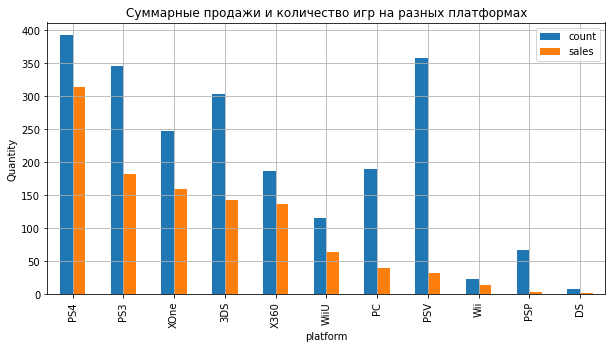

In [91]:
#Построим график
df_platform.plot.bar(grid=True,figsize=(10,5))
plt.title("Суммарные продажи и количество игр на разных платформах")
plt.ylabel('Quantity')
plt.show()


In [92]:
#Посчитаем конверсию для данных платформ
df_platform['conversion']=(df_platform['sales']/df_platform['count'])*100
df_platform

,count,sales,conversion
platform,,,
PS4,392,314.14,80.137755
PS3,345,181.43,52.588406
XOne,247,159.32,64.502024
3DS,303,143.25,47.277228
X360,186,136.80,73.548387
WiiU,115,64.63,56.200000
PC,189,39.43,20.862434
PSV,358,32.99,9.215084
Wii,23,13.66,59.391304


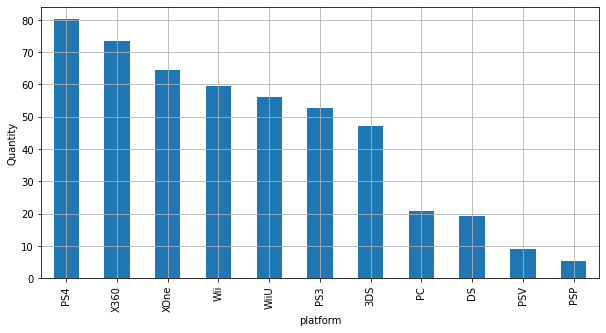

In [93]:
#Построим график
df_platform.sort_values(by='conversion', ascending=False).plot.bar(y='conversion', grid=True,figsize=(10,5),legend=False)
plt.ylabel('Quantity')
plt.show()

Че выше конверсия, тем больше окупаемость игр,соответственно выгоднее выпускать первые релизы игр на более популярных платформах

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
Возьмем платформы со средним количеством продаж: X360, PS3

Корреляция между оценкой критиков и продажами для X360 : 0.35
Корреляция между оценкой пользователей и продажами для X360 : -0.01


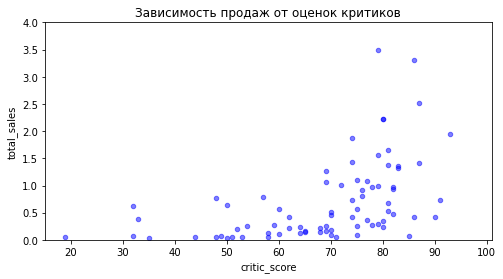

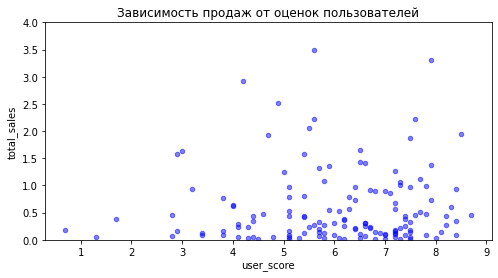

In [94]:
score('X360')

Корреляция между оценкой критиков и продажами для PS3 : 0.33
Корреляция между оценкой пользователей и продажами для PS3 : 0.0


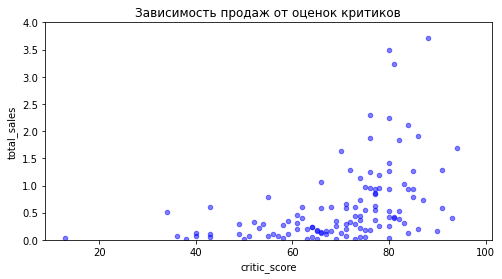

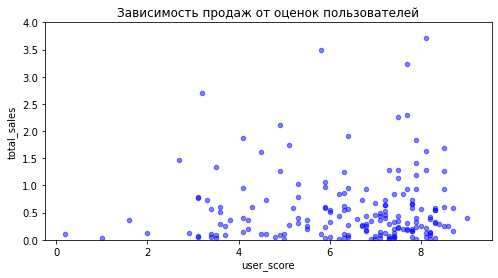

In [95]:
score('PS3')

**Итог**
    
Выводы сделанные ранее подтверждаются и на других платформах       
       


###  Посмотрим на общее распределение игр по жанрам. 
Ответим на вопросы:
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [96]:
genre = (df_filter
         .pivot_table(index='genre', values='total_sales',columns = 'year_of_release',aggfunc=['count'],margins=True)
        )
genre = genre[:-1]     

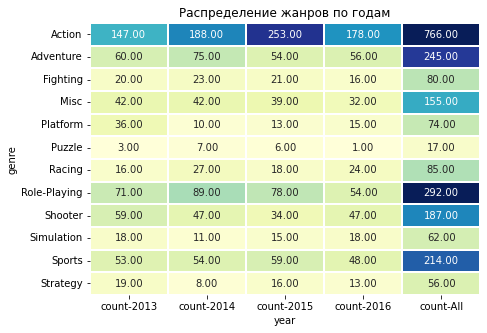

In [97]:
plt.figure(figsize=(7, 5))
sns.heatmap(genre, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.title("Распределение жанров по годам")
plt.xlabel('year')
plt.ylabel('genre')
plt.show()

У нас есть лидеры по количеству игр, посмотрим какое соотношение с продажами.  
Выделяются игры таких жанров как: Action, Adventure, Role-Playing, Shooter, Sports,Music  
Далее идут: Racing, Fighting, Platform


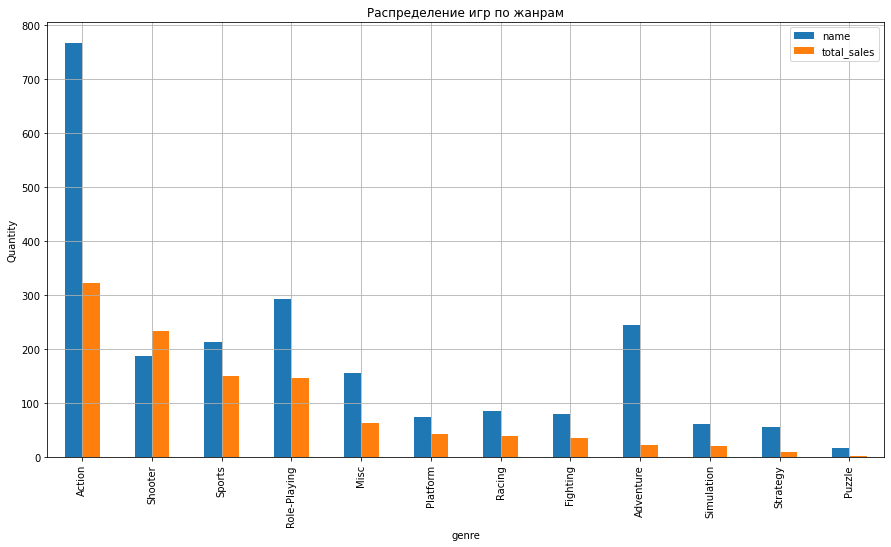

In [98]:
(df_filter.groupby('genre').agg(({'name':'count','total_sales':'sum'}))
      .sort_values(by='total_sales',ascending=False)
      .plot.bar(grid=True,figsize=(15,8),title='Распределение игр по жанрам')
)
plt.ylabel('Quantity')
plt.show()

По количеству мы выделили: Action, Adventure, Role-Playing, Shooter, Sports,Music  
Отметим, что в жанре Adventure много игр, но доход по ним один из самых низких

Проанализируем прибыльность на диаграмме размаха, сравним медианное значение и определим какой жанр более стаблильный

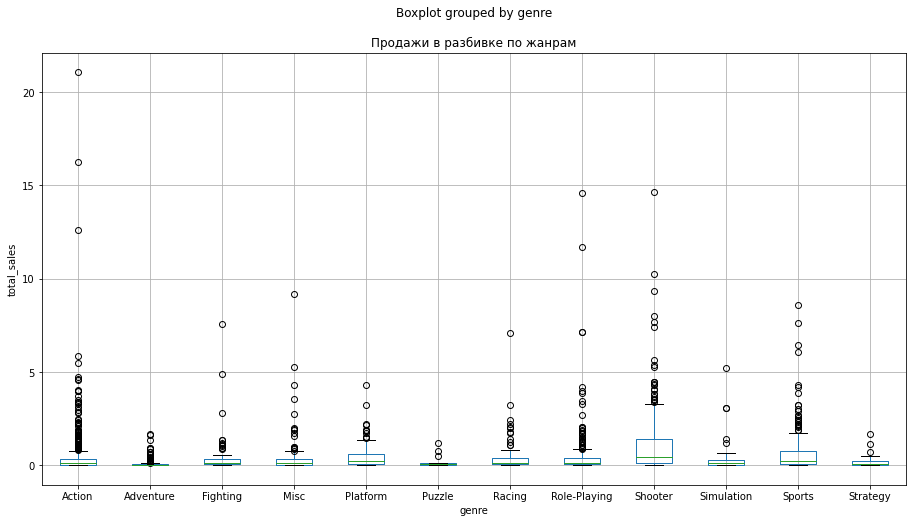

In [99]:
df_filter.boxplot('total_sales',by='genre',grid=True, figsize=(15,8))
plt.title("Продажи в разбивке по жанрам")
plt.ylabel("total_sales")
plt.show()


Уберем выбросы, чтобы поближе рассмотреть график. 

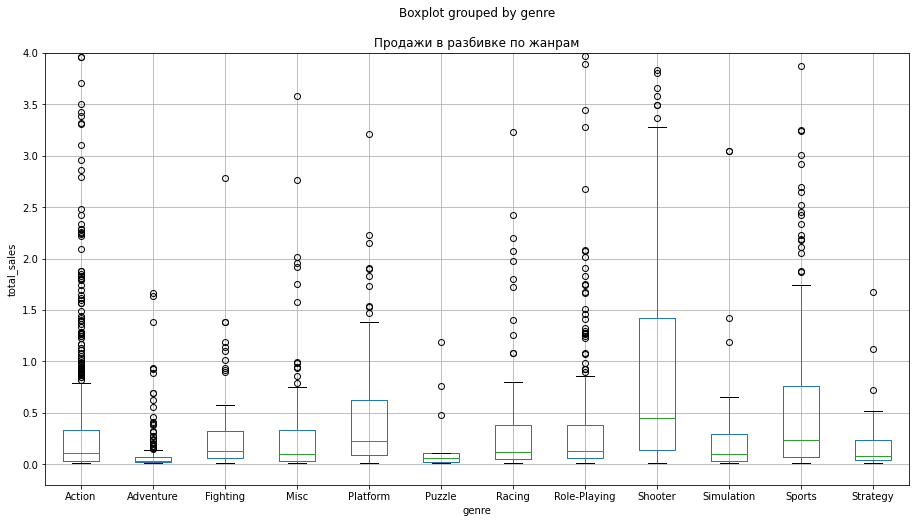

In [100]:
df_filter.boxplot('total_sales',by='genre',grid=True, figsize=(15,8)).set(ylim=(-0.2,4))
plt.title("Продажи в разбивке по жанрам")
plt.ylabel("total_sales")
plt.show()

In [101]:
#Посмотрим полученные данные по таблице также
df_genre = (df_filter.groupby('genre').agg(({'name':'count','total_sales':'median'}))
      .sort_values(by='total_sales',ascending=False)  
 )
df_genre.columns=['count','median']

df_genre 

,count,median
genre,,
Shooter,187,0.450
Sports,214,0.240
Platform,74,0.225
Role-Playing,292,0.125
Fighting,80,0.125
Racing,85,0.120
Action,766,0.110
Simulation,62,0.100
Misc,155,0.100


**Итог:**

В лидерах у нас оказались жанры Shooter, Sports, Platform, 
Из данных видно, что хотя жанр Action лидирует и по количеству игр и по суммарным продаж, но по медианным значения на 8 месте только.
Менее популярные жанры: Puzzle, Adventure, Strategy


Посмотрим итоговый результат

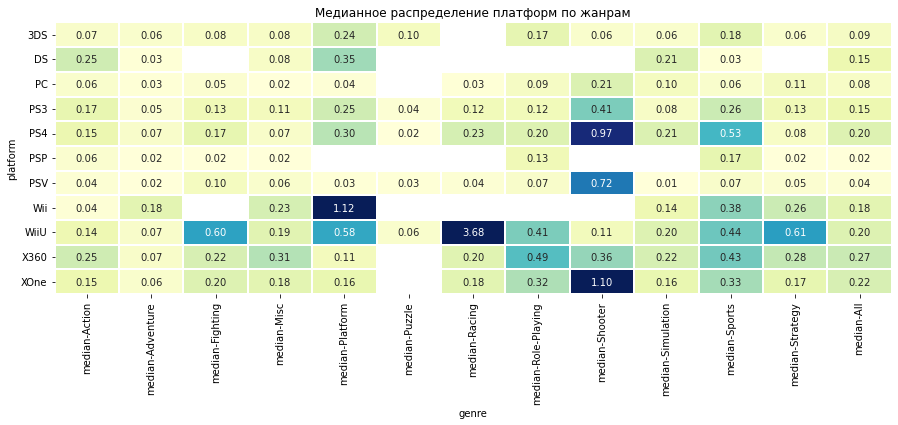

In [102]:
df_total = (df_filter
         .pivot_table(index='platform', values='total_sales',columns = 'genre',aggfunc=['median'],margins=True)
        )
df_total = df_total[:-1]    

plt.figure(figsize=(15, 5))
sns.heatmap(df_total, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.title("Медианное распределение платформ по жанрам")
plt.ylabel('platform')
plt.xlabel('genre')
plt.show()

**Вывод**

Мы посмотрели сколько игр выпускалось в разные годы, как менялись продажи и срок жизни платформы:
Срок жизни платформы примерно 10 лет, поэтому для анализа мы определили актуальный период: с 2013 года. т.к. нам нужны данные, которые помогут построить прогноз на 2017 год.

Выбрали несколько потенциально прибыльных платформ: 
Топ-3: PS4,XOne,WiiU 

Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
* зависимости между отзывами пользователей и продажами у нас неоднозначная, на некоторых платфорах ее нет, на некоторых просматривается не слишком большая.
* Зависимость между отзывами критиков и продажами существует, однако не слишком большая. 

platform |critic_score | user_score | 
:--------:|:-------:|:-----------:|
  PS4    | 0.41          |-0.03 |
 XOne     |  0.42       | -0.07|
3DS       |  0.36        |0.24 |
WiiU |	0.38	|0.42
X360      |  0.35       | -0.01 |
PS3      |  0.33       | 0.00|

При прогнозе продаж немного надежнее полагаться на отзывы критиков, чем на отзывы пользователей, но мы не можем утверждать, что высокие оценки критиков могут привести к высоким продажам.

Посмотрели на общее распределение игр по жанрам. 

В лидерах у нас оказались жанры Shooter, Sports, Platform.
Из данных видно, что хотя жанр Action лидирует и по количеству игр и по суммарным продаж, но по медианным значения на 8 месте только. Но от этого она не стала менее популярной для пользователей.
Менее популярные жанры: Puzzle, Adventure, Strategy  
Остальные жанры имеют примерно одинаковое медианное значение:
Role-Playing, Fighting,Racing,Simulation,Misc  


- Shooter хорошо идет на платформах PS4,XOne
- Sports хорошо идет на платформах PS4,XOne, WiiU
- Platform хорошо идет на платформах PS4, WiiU

Результат анализа по всем платформам и жанрам :

platform |год    | Популярные жанры | Комментарии
:--------:|:-------:|:-----------:|:-----------:| 
PS4 |2013-2016|Platform,Srorts,Shooter | Сейчас в росте,стабильные показатели медианы 0,20 и диагрыммы размаха. |
PS3	  | 2006-2016	|Platform,Srorts,Shooter |Пик пришелся на 2011 год,сейчас на спаде, стабильные показатели медианы 0,15 и диагрыммы размаха, был в топе по количеству игр|
XOne |	20013-2016|Shooter,Srorts,Role-Playing|Сейчас в росте,стабильные показатели медианы 0,22 и диагрыммы размаха.  |
3DS|2011-2016|Platform,Srorts,Role-Playing |к 2015 году наблюдается спад, медиана 0,09, продажи засчет популярных игр |
X360  |	2005-2016|Shooter,Srorts,Role-Playing|Пик в 2010 г.,сейчас на спаде,стабильные показатели медианы 0,22 и диагрыммы размаха, в топе по количеству игр|
WiiU  |	2012-2016	|Fighting,Racing,Platform,Strategy	|небольшое количество игр, стабильны по продажам,медиана 0,20 |
PC  |	1993-2016	|Shooter, Strategy	|на рынке постоянный игрок, количество игр небольшое, медиана 0,08|
PSV	  | 2011-2016	|Shooter,Fighting|маленькое количество игр и продаж, медиана 0,04|
Wii	 | 2006-2016	|Platform,Srorts,Strategy |по количеству игр в топе, сейчас на спаде, медиана 0,18 |
PSP  |	2004-2015	|Srorts,Role-Playing |Нет уже данных с 2015 года, для нас неактуально |
DS	 | 2004-2013	|Platform,Simulation,Action|Нет уже данных с 2013 года, для нас неактуально | 




##  Составить портрет пользователя каждого региона.

Определить для пользователя каждого региона (NA, EU, JP)

###  Самые популярные платформы (топ-5)

Напишем функцию для определения топ-5 каждого региона

In [103]:
def top(row,col):
    top = df_filter.pivot_table(index=col, values=row,aggfunc='sum').sort_values(row, ascending = False)
    top['%'] = (top[row]/top[row].sum()*100).round(2)
    print(top)
    print()
    top.plot(y = '%', kind = 'pie', figsize = (15,6), 
                                                     title = f'Топ-5 {col} в {row}', autopct='%1.1f%%',legend=False)
    print()
    df_filter.boxplot(column=row,by=col,grid=True, figsize=(15,5)).set(ylim=(-0.1,1.2))
             
    plt.show() 

####  NA — продажи в Северной Америке 


          na_sales      %
platform                 
PS4         108.74  24.84
XOne         93.12  21.27
X360         81.66  18.66
PS3          63.50  14.51
3DS          38.20   8.73
WiiU         29.21   6.67
PC           11.11   2.54
Wii           6.56   1.50
PSV           5.04   1.15
DS            0.57   0.13
PSP           0.00   0.00




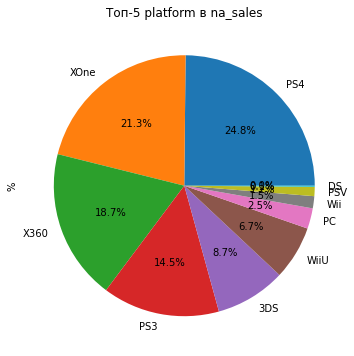

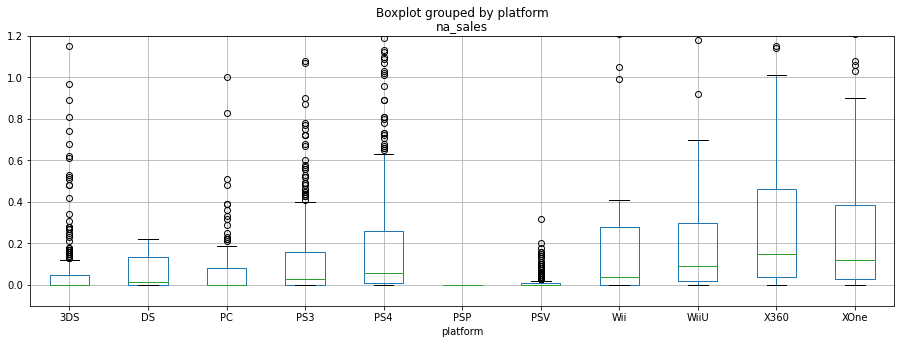

In [104]:
top('na_sales','platform')

Топ-5 платформ по продажам в Северной Америке: PS4, X360,XOne,PS3,3DS  
PS3,3DS -хоть у них и самое низкое медианное значение, но они вырываются вперед засчет популярных игор, что видно по большому колиеству выборосов на графике

####  EU — продажи в Европе


          eu_sales      %
platform                 
PS4         141.09  35.97
PS3          67.81  17.29
XOne         51.59  13.15
X360         42.52  10.84
3DS          30.96   7.89
PC           25.36   6.47
WiiU         19.85   5.06
PSV           6.10   1.56
Wii           5.93   1.51
DS            0.85   0.22
PSP           0.17   0.04




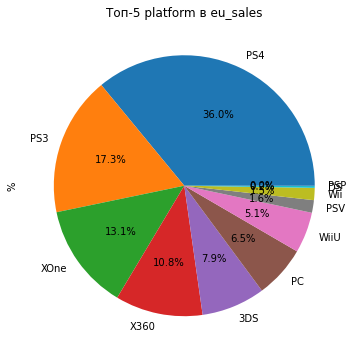

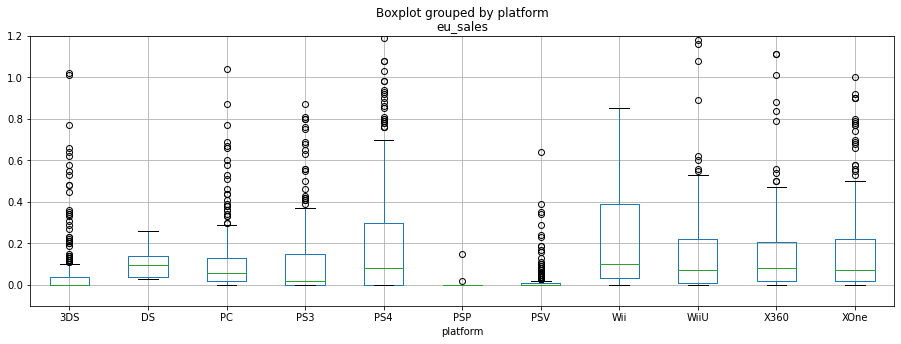

In [105]:
top('eu_sales','platform')

Топ-5 платформ по продажам в Европе: PS4, PS3,XOne,X360,3DS  
Отметим, что топ-5 такой же, как и в Северной Америке, только процентное соотношение изменилось  

####  JP — продажи в Японии 

          jp_sales      %
platform                 
3DS          67.81  48.17
PS3          23.35  16.59
PSV          18.59  13.21
PS4          15.96  11.34
WiiU         10.88   7.73
PSP           3.29   2.34
X360          0.51   0.36
XOne          0.34   0.24
Wii           0.05   0.04
DS            0.00   0.00
PC            0.00   0.00




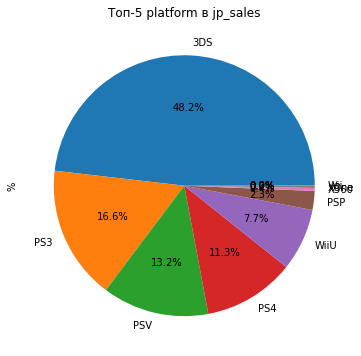

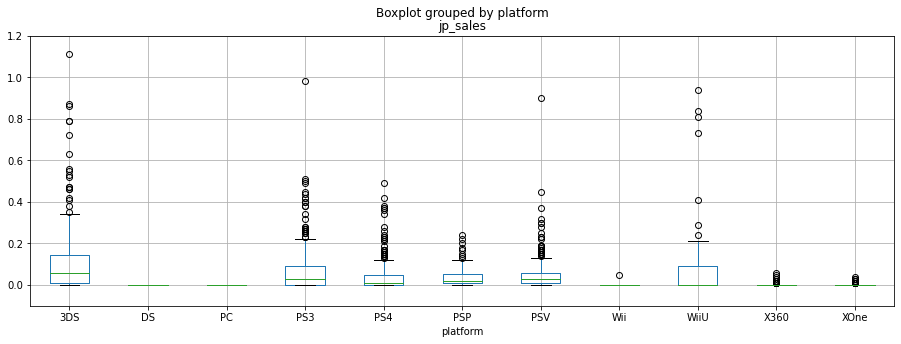

In [106]:
top('jp_sales','platform')

Топ-5 платформ по продажам в Японии: 3DS,PS3,PSV,PS4,Wii  
В Японии картина отличается, 48% занимает их портативная консоль 3DS. В целом по нашей выборке продаж в Японии меньше.



**Итог**

В Северной Америке и Европе одинаковый топ-5 платформ: PS4, X360,XOne,PS3,3DS , отличие только в процентном соотношение. И там, и там первое место занимает платформа PS4.  
В Японии первое место занимает их портативная консоль 3DS, там уже нет X360,XOne. Топ- в Японии: 3DS,PS3,PSV,PS4,WiiU 




### Самые популярные жанры (топ-5)

####  NA — продажи в Северной Америке 

              na_sales      %
genre                        
Action          126.05  28.80
Shooter         109.74  25.07
Sports           65.27  14.91
Role-Playing     46.40  10.60
Misc             27.49   6.28
Platform         18.14   4.14
Fighting         15.55   3.55
Racing           12.96   2.96
Adventure         7.14   1.63
Simulation        4.86   1.11
Strategy          3.28   0.75
Puzzle            0.83   0.19




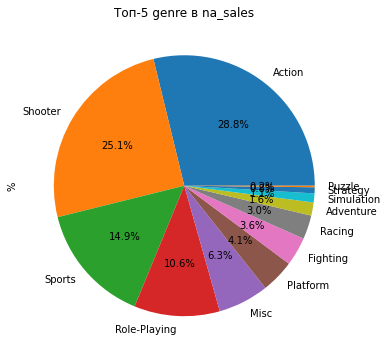

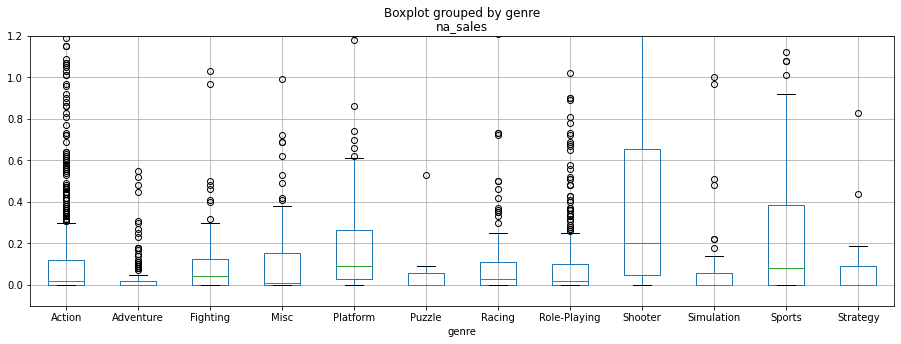

In [107]:
top('na_sales','genre')

Топ-5 жанров в Северной Америке: Action, Shooter,Sports,Role-Playing ,Misc   
Action на первом месте, хоть медиана и маленькая, но если игра станет популярной, то она собирает много денег.


####  EU — продажи в Европе

              eu_sales      %
genre                        
Action          118.13  30.12
Shooter          87.86  22.40
Sports           60.52  15.43
Role-Playing     36.97   9.43
Racing           20.19   5.15
Misc             20.04   5.11
Platform         15.58   3.97
Simulation       10.92   2.78
Fighting          8.55   2.18
Adventure         8.25   2.10
Strategy          4.22   1.08
Puzzle            1.00   0.25




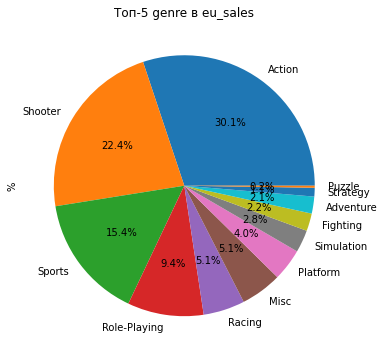

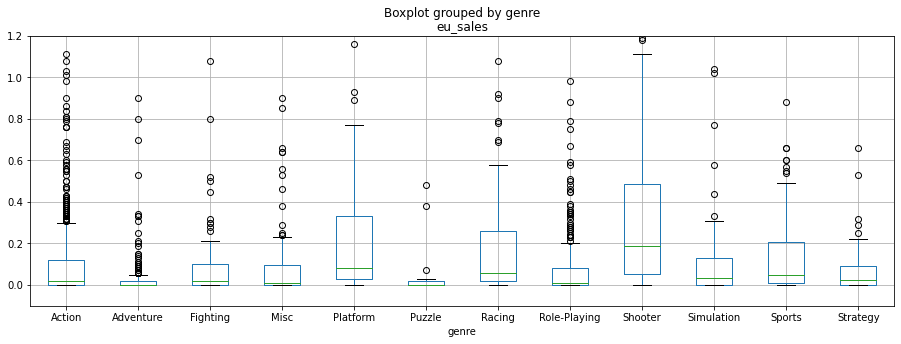

In [108]:
top('eu_sales','genre')

Топ-5 жанров в Европе: Action, Shooter,Sports,Role-Playing ,Misc и Racing разделили 5 место.  
Отметим, что топ-5 такой же, как и в Северной Америке, только процентное соотношение изменилось  

####  JP — продажи в Японии 

              jp_sales      %
genre                        
Role-Playing     51.04  36.26
Action           40.49  28.76
Misc              9.20   6.54
Fighting          7.65   5.43
Shooter           6.61   4.70
Adventure         5.82   4.13
Sports            5.41   3.84
Platform          4.79   3.40
Simulation        4.52   3.21
Racing            2.30   1.63
Strategy          1.77   1.26
Puzzle            1.18   0.84




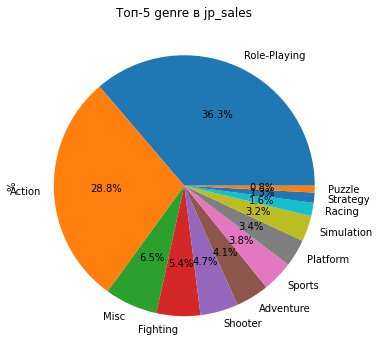

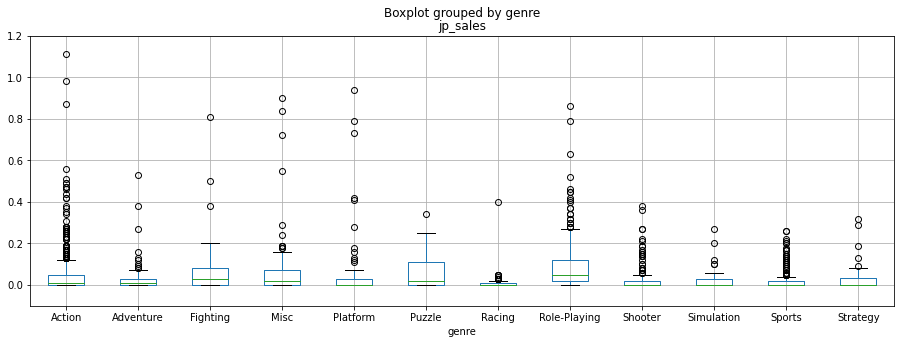

In [109]:
top('jp_sales','genre')

Топ-5 жанров в Японии: Role-Playing,Action, ,Misc,Fighting ,Shooter   
В Японии больше всего популярны жанры Role-Playing-36.26%,Action-28.76

**Итог**

Самые популярные жанры в Северной Америке и Европе -Action, Shooter, Sports, Role-Playing и Misc.  
В Японии основную массу занимают жанры Role-Playing, Action и Misc, кроме этого популярны Platform и Shooter. 

Определим топ-5 и построим круговую диаграмму для 3 регионов.  
Все платформы, которые не входят в топ-5 объединим в категорию 'other'

In [110]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

C:\Users\Home\AppData\Local\Temp\ipykernel_15924\903776553.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reg = df_reg.append({'platform': 'other',
C:\Users\Home\AppData\Local\Temp\ipykernel_15924\903776553.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reg = df_reg.append({'platform': 'other',
C:\Users\Home\AppData\Local\Temp\ipykernel_15924\903776553.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reg = df_reg.append({'platform': 'other',


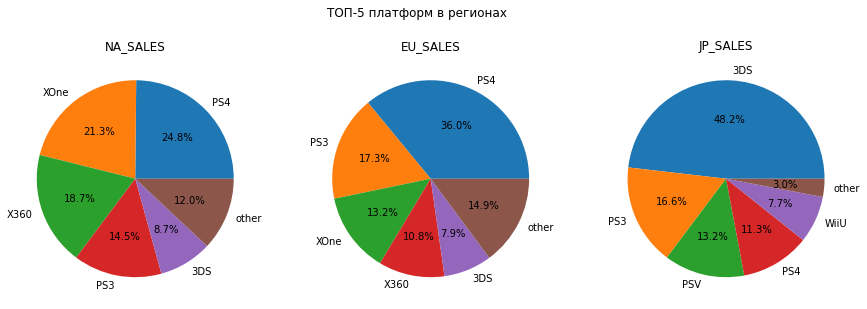

In [111]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
    df_reg = df_filter.groupby('platform')[regions[i]].sum().sort_values(
        ascending = False)[:5].reset_index()
    df_reg = df_reg.append({'platform': 'other',
            regions[i]: df_filter[regions[i]].sum() - df_reg[regions[i]].sum()},
            ignore_index= True)
    ax[i].pie(df_reg[regions[i]], labels = df_reg['platform'], autopct='%1.1f%%')
    ax[i].set_title(regions[i].upper())
plt.show()


Аналогично сделаем для жанров

C:\Users\Home\AppData\Local\Temp\ipykernel_15924\1907281247.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reg = df_reg.append({'genre': 'other',
C:\Users\Home\AppData\Local\Temp\ipykernel_15924\1907281247.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reg = df_reg.append({'genre': 'other',
C:\Users\Home\AppData\Local\Temp\ipykernel_15924\1907281247.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reg = df_reg.append({'genre': 'other',


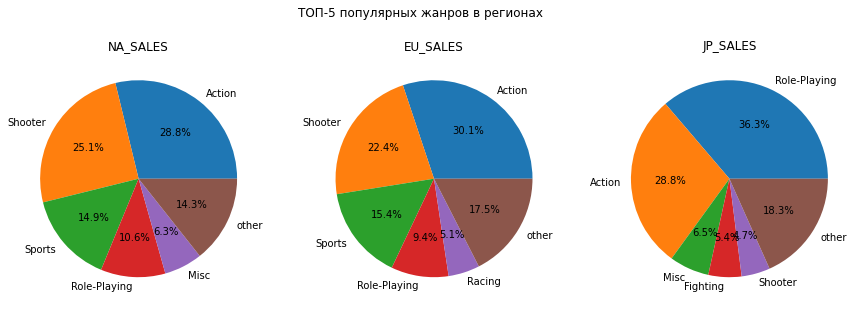

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 популярных жанров в регионах')
for i in range(3):
    df_reg = df_filter.groupby('genre')[regions[i]].sum().sort_values(
        ascending = False)[:5].reset_index()
    df_reg = df_reg.append({'genre': 'other',
            regions[i]: df_filter[regions[i]].sum() - df_reg[regions[i]].sum()},
            ignore_index= True)
    ax[i].pie(df_reg[regions[i]], labels = df_reg['genre'], autopct='%1.1f%%')
    ax[i].set_title(regions[i].upper())
plt.show()

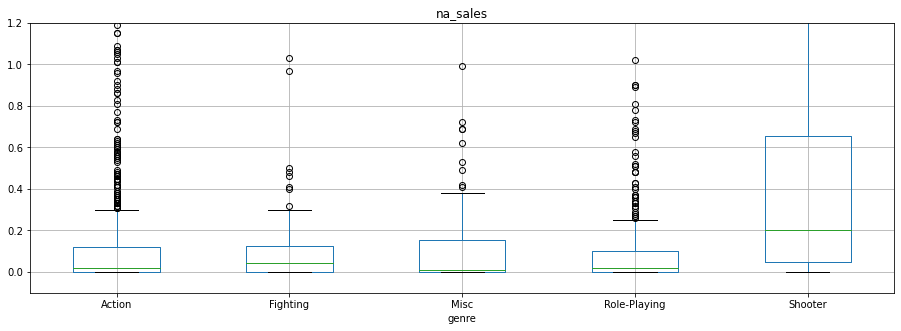

In [113]:
# check
g = df_reg['genre']
df_filter.query('genre in @g').boxplot(column='na_sales', by='genre', grid=True, figsize=(15,5)).set(ylim=(-0.1,1.2))
plt.suptitle('');

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

| Рейтинг | Определение | Возраст|
|:--:|:--:|:--:|
|E | («Everyone») — «Для всех»   |  любой
|T  | («Teen») — «Подросткам»    | от 13 лет
|M  |   («Mature») — «Для взрослых»   | от 17 лет
|E10+ | («Everyone 10 and older») — «Для всех от 10 лет и старше | от 10 лет
|EC  | («Early childhood») — «Для детей младшего возраста» | от 3х лет|      
|K-A |  ("Kids to Adults") -старое название, теперь применяется рейтинг E   | любой
|AO  | («Adults Only 18+») — «Только для взрослых      | старше 18 лет
|RP   |  («Rating Pending») — «Рейтинг ожидается»    | неизвестно



         na_sales      %
rating                  
M          165.21  37.74
unknown     89.42  20.43
E           79.05  18.06
E10+        54.24  12.39
T           49.79  11.38




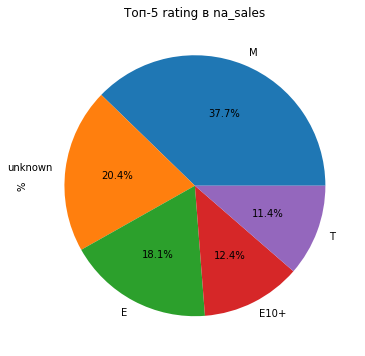

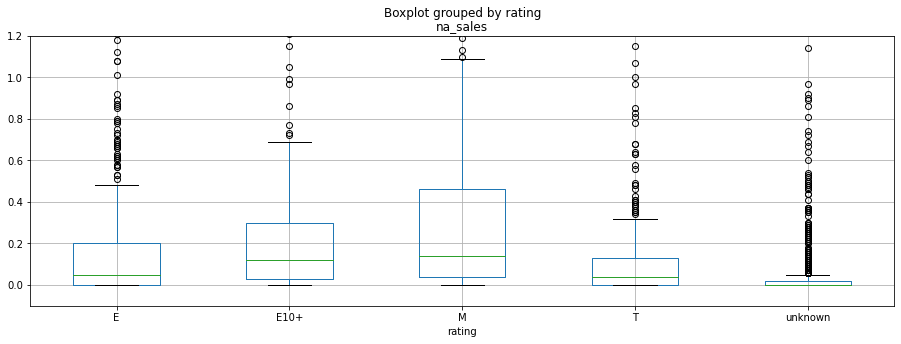

In [114]:
top('na_sales','rating')

         eu_sales      %
rating                  
M          145.32  37.05
E           83.36  21.25
unknown     78.91  20.12
E10+        42.69  10.88
T           41.95  10.70




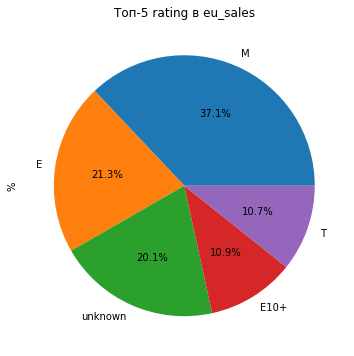

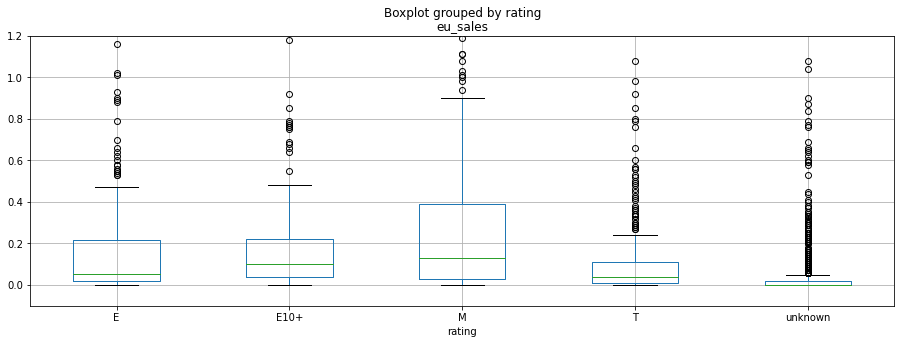

In [115]:
top('eu_sales','rating')

         jp_sales      %
rating                  
unknown     85.05  60.41
T           20.59  14.63
E           15.14  10.75
M           14.11  10.02
E10+         5.89   4.18




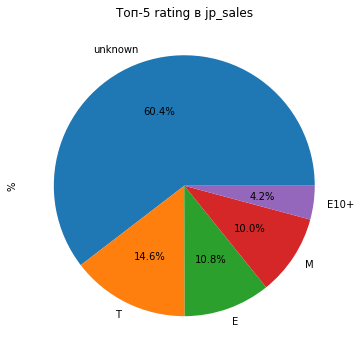

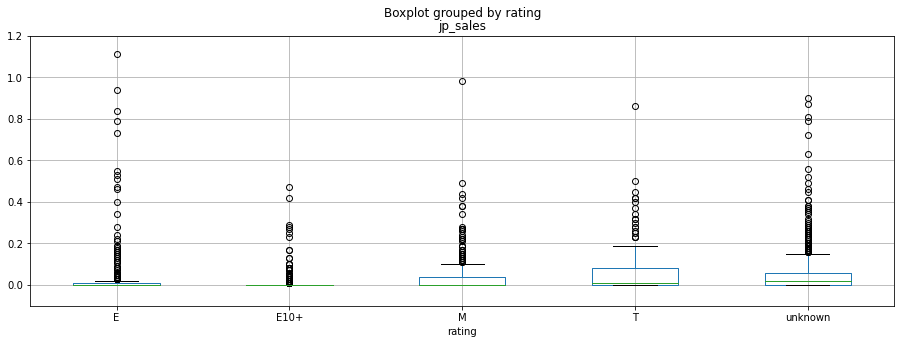

In [116]:
top('jp_sales','rating')

Снова похожая ситуация для Европы и Cеверной Америки - хорошо продаются игры с рейтингом для взрослых(M) и для всех(E).
В Японии много продаж по играм с неизвестным рейтингом, так же популярны игры с рейтингом для всех(Е) и подростков (Т)

**Вывод**

Платформы топ-5:

* В Северной Америке: PS4, X360,XOne,PS3,3DS  
PS3,3DS -хоть у них и самое низкое медианное значение, но они вырываются вперед засчет популярных игор, что видно по большому колиеству выборосов на графике  
* В Европе: PS4, PS3,XOne,X360,3DS   
Отметим, что топ-5 такой же, как и в Северной Америке, только процентное соотношение изменилось  
* В Японии:  3DS,PS3,PSV,PS4,WiiU  
В Японии картина отличается, 48% занимает их портативная консоль 3DS. 


Жанры топ-5:

* В Северной Америке: Action, Shooter,Sports,Role-Playing ,Misc
Action на первом месте, хоть медиана и маленькая, но если игра станет популярной, то она собирает много денег.
* В Европе:Action, Shooter,Sports,Role-Playing ,Misc и Racing разделили 5 место.
Отметим, что топ-5 такой же, как и в Северной Америке, только процентное соотношение изменилось
* В Японии:Role-Playing,Action, ,Misc,Fighting ,Shooter
В Японии больше всего популярны жанры Role-Playing-36.26%,Action-28.76%

Влияение рейтинга ESRB на продажи:

Снова похожая ситуация для Европы и Cеверной Америки - хорошо продаются игры с рейтингом для взрослых(M) и для всех(E), затем идут игры для подростков.  
В Японии много продаж по играм с неизвестным рейтингом, так же популярны игры с рейтингом для всех(Е) и для подростков (Т), скорее всего, это связано с тем, что ESRB определяет рейтинг для игр в США и Канаде.





##  Проверить гипотезы

###  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую(H0) и альтернативную гипотезу(H1)  
H0: Средние пользовательские рейтинги платформ Xbox One и PC равны  
H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны  

Для анализа будем использовать t-критерий Стьюдента, поскольку сравниваемые выборки независимы между собой.

In [117]:
results = st.ttest_ind(
    df_filter.loc[df_filter['platform'] == 'XOne']['user_score'],
    df_filter.loc[df_filter['platform'] == 'PC']['user_score'],
    equal_var=True, nan_policy='omit')

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.1401265840361139
Не получилось отвергнуть нулевую гипотезу


Полученное знаечение p-значение: 0.14 говорит о том, что с вероятностью 14% такой результат(Средние пользовательские рейтинги платформ Xbox One и PC равны) можно получить случайно, поэтому на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую(H0) и альтернативную гипотезу(H1)  
H0: Средние пользовательские рейтинги жанров Action и Sports равны.  
H1: Средние пользовательские рейтинги жанров Action и Sports не равны.  

Для анализа будем использовать t-критерий Стьюдента, поскольку сравниваемые выборки независимы между собой.

In [118]:
results = st.ttest_ind(
    df_filter.loc[df_filter['genre'] == 'Action']['user_score'],
    df_filter.loc[df_filter['genre'] == 'Sports']['user_score'],
    equal_var=True, nan_policy='omit')

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0517832389142297e-27
Отвергаем нулевую гипотезу


Полученное знаечение p-значение: 1.05*10^(−27) говорит о том, что с очень маленькой вероятностью такой результат(Средние пользовательские рейтинги жанров Action и Sports равны) можно получить случайно, поэтому на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативной.

##  Общий вывод

Было проведено исследование, чтобы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
 Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
В нашей выборке данные до 2016 года. Основной фактор — эти данные помогут построить прогноз на 2017 год.  

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке игр.

Перед проведением исследования дополнительно были поставлены задачи:

Задача 1: Составьте портрет пользователя каждого региона: популярные платформы, жанры и влияния рейтинга на продажи.  

Задача 2: Проверить гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Перед тем как приступить к решению задач, мы подготовили наши данные для дальнейшего анализа: 
 * Привели к нижнему регистру заголовки и значения в столбцах: Name, platform,Genre
 * В результате исследования мы скорректировали следующие значения:

|| Столбец | Изменения  | 
|:--:|:----------------:|:---------------:|
|1| Name      | убрали все пропуски, так как доля пропусков всего 0.000120         |
|2| Year_of_Release              | удалили пропущенные значения,заменили тип данных на int          |
|3| Genre          | убрали все пропуски       |
|4| User_Score         | Заменили значение 'tbd' на 'nan',заменили тип данных на float         |
|5| Rating     | заменили пропуски на 'unknown' и объединили рейтинг K-A с E     |


 * Добавлен новый столбец total_sales - суммарные продажи во всех регионах


Провели исследовательский анализ данных:

Мы посмотрели сколько игр выпускалось в разные годы, как менялись продажи и срок жизни платформы:
Срок жизни платформы примерно 10 лет, поэтому для анализа мы определили актуальный период: с 2013 года. т.к. нам нужны данные, которые помогут построить прогноз на 2017 год.

Выбрали несколько потенциально прибыльных платформ: 
Топ-3: PS4,XOne,WiiU 

Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
* зависимости между отзывами пользователей и продажами у нас неоднозначная, на некоторых платфорах ее нет, на некоторых просматривается не слишком большая.
* Зависимость между отзывами критиков и продажами существует, однако не слишком большая. 

platform |critic_score | user_score | 
:--------:|:-------:|:-----------:|
  PS4    | 0.41          |-0.03 |
 XOne     |  0.42       | -0.07|
3DS       |  0.36        |0.24 |
WiiU |	0.38	|0.42
X360      |  0.35       | -0.01 |
PS3      |  0.33       | 0.00|

При прогнозе продаж немного надежнее полагаться на отзывы критиков, чем на отзывы пользователей, но мы не можем утверждать, что высокие оценки критиков могут привести к высоким продажам.

Посмотрели на общее распределение игр по жанрам. 

В лидерах у нас оказались жанры Shooter, Sports, Platform.
Из данных видно, что хотя жанр Action лидирует и по количеству игр и по суммарным продаж, но по медианным значения на 8 месте только. Но от этого она не стала менее популярной для пользователей.
Менее популярные жанры: Puzzle, Adventure, Strategy  
Остальные жанры имеют примерно одинаковое медианное значение:
Role-Playing, Fighting,Racing,Simulation,Misc  


- Shooter хорошо идет на платформах PS4,XOne
- Sports хорошо идет на платформах PS4,XOne, WiiU
- Platform хорошо идет на платформах PS4, WiiU

Результат анализа по всем платформам и жанрам :

platform |год    | Популярные жанры | Комментарии
:--------:|:-------:|:-----------:|:-----------:| 
PS4 |2013-2016|Platform,Srorts,Shooter | Сейчас в росте,стабильные показатели медианы 0,20 и диагрыммы размаха. |
PS3	  | 2006-2016	|Platform,Srorts,Shooter |Пик пришелся на 2011 год,сейчас на спаде, стабильные показатели медианы 0,15 и диагрыммы размаха, был в топе по количеству игр|
XOne |	20013-2016|Shooter,Srorts,Role-Playing|Сейчас в росте,стабильные показатели медианы 0,22 и диагрыммы размаха.  |
3DS|2011-2016|Platform,Srorts,Role-Playing |к 2015 году наблюдается спад, медиана 0,09, продажи засчет популярных игр |
X360  |	2005-2016|Shooter,Srorts,Role-Playing|Пик в 2010 г.,сейчас на спаде,стабильные показатели медианы 0,22 и диагрыммы размаха, в топе по количеству игр|
WiiU  |	2012-2016	|Fighting,Racing,Platform,Strategy	|небольшое количество игр, стабильны по продажам,медиана 0,20 |
PC  |	1993-2016	|Shooter, Strategy	|на рынке постоянный игрок, количество игр небольшое, медиана 0,08|
PSV	  | 2011-2016	|Shooter,Fighting|маленькое количество игр и продаж, медиана 0,04|
Wii	 | 2006-2016	|Platform,Srorts,Strategy |по количеству игр в топе, сейчас на спаде, медиана 0,18 |
PSP  |	2004-2015	|Srorts,Role-Playing |Нет уже данных с 2015 года, для нас неактуально |
DS	 | 2004-2013	|Platform,Simulation,Action|Нет уже данных с 2013 года, для нас неактуально | 


После приступили к анализу данных в рамках задач, которые перед нами стояли.

1. Задача: Составьте портрет пользователя каждого региона

Платформы топ-5:

* В Северной Америке: PS4, X360,XOne,PS3,3DS  
PS3,3DS -хоть у них и самое низкое медианное значение, но они вырываются вперед засчет популярных игор, что видно по большому колиеству выборосов на графике  
* В Европе: PS4, PS3,XOne,X360,3DS   
Отметим, что топ-5 такой же, как и в Северной Америке, только процентное соотношение изменилось  
* В Японии:  3DS,PS3,PSV,PS4,WiiU  
В Японии картина отличается, 48% занимает их портативная консоль 3DS. 


Жанры топ-5:

* В Северной Америке: Action, Shooter,Sports,Role-Playing ,Misc
Action на первом месте, хоть медиана и маленькая, но если игра станет популярной, то она собирает много денег.
* В Европе:Action, Shooter,Sports,Role-Playing ,Misc и Racing разделили 5 место.
Отметим, что топ-5 такой же, как и в Северной Америке, только процентное соотношение изменилось
* В Японии:Role-Playing,Action, ,Misc,Fighting ,Shooter
В Японии больше всего популярны жанры Role-Playing-36.26%,Action-28.76%

Влияение рейтинга ESRB на продажи:

Снова похожая ситуация для Европы и Cеверной Америки - хорошо продаются игры с рейтингом для взрослых(M) и для всех(E), затем идут игры для подростков.  
В Японии много продаж по играм с неизвестным рейтингом, так же популярны игры с рейтингом для всех(Е) и для подростков (Т), скорее всего, это связано с тем, что ESRB определяет рейтинг для игр в США и Канаде.

2. Задача: Проверить гипотезы

В результате проверки, мы получили значения, которые говорят нам о том, что на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

